
## Ecommerce Capstone Project




# CRM analysis


Dataset: https://drive.google.com/drive/folders/1Iesv1Y7DVdv6Z4Oq8IwJ99_gMSEFecDk?usp=sharing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset
df = pd.read_csv("/content/Ecom_CRM_analysis.csv", encoding='unicode_escape')


In [ ]:
# Displaying basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [ ]:
# Checking the first few rows of the dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [ ]:
# Checking for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Droping rows with missing CustomerID (since we need customer information for CRM analysis)
df_clean = df.dropna(subset=['CustomerID'])

Handling Cancellations and Returns:

In [ ]:
# Converting negative Quantity values to positive for consistency
df_clean['Quantity'] = df_clean['Quantity'].abs()

<ipython-input-72-b45514fcd193>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Quantity'] = df_clean['Quantity'].abs()


Handling Free Items (Zero UnitPrice):

In [ ]:
# Filtering out transactions with zero UnitPrice
df_clean = df_clean[df_clean['UnitPrice'] > 0]


Convert InvoiceDate to DateTime format:

In [ ]:
# Converting InvoiceDate to DateTime format
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics
print(df_clean.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  406789.000000                         406789  406789.000000   
mean       13.379467  2011-07-10 16:28:44.845459968       3.460811   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:46:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       247.858601                            NaN      69.318561   

          CustomerID  
count  406789.000000  
mean    15287.795830  
min     12346.000000  
25%     13954.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.573064  


In [ ]:
# Checking unique values and distributions
print(df_clean['Country'].value_counts())

Country
United Kingdom          361854
Germany                   9493
France                    8490
EIRE                      7483
Spain                     2532
Netherlands               2367
Belgium                   2069
Switzerland               1876
Portugal                  1480
Australia                 1256
Norway                    1085
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon                     45


In [ ]:
# Saving cleaned dataset to a new CSV file
df_clean.to_csv("cleaned_dataset.csv", index=False)


In [ ]:
# Loading cleaned dataset
df = pd.read_csv("cleaned_dataset.csv", parse_dates=['InvoiceDate'])
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406784,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406785,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406786,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406787,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Customer-Centric Feature Engineering
Recency, Frequency, Monetary (RFM) Analysis
Calculate RFM Metrics for Each Customer

In [ ]:
# Calculating Recency, Frequency, and Monetary values
import datetime as dt

# Calculating recency (latest date in the dataset)
latest_date = df['InvoiceDate'].max()

# Creating RFM table per customer
rfm_table = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'UnitPrice': 'sum'        # Monetary (total spending)
})

# Rename columns for clarity
rfm_table.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'UnitPrice': 'Monetary'
}, inplace=True)


RFM Segmentation
Categorize Customers Based on RFM Scores

In [ ]:
# Defining quartiles for RFM scores
quantiles = rfm_table.quantile(q=[0.25, 0.50, 0.75])

# Creating RFM segments
def rfm_segment(row, quantiles):
    r_score = 4 if row['Recency'] <= quantiles['Recency'][0.25] else \
              3 if row['Recency'] <= quantiles['Recency'][0.50] else \
              2 if row['Recency'] <= quantiles['Recency'][0.75] else 1

    f_score = 1 if row['Frequency'] <= quantiles['Frequency'][0.25] else \
              2 if row['Frequency'] <= quantiles['Frequency'][0.50] else \
              3 if row['Frequency'] <= quantiles['Frequency'][0.75] else 4

    m_score = 1 if row['Monetary'] <= quantiles['Monetary'][0.25] else \
              2 if row['Monetary'] <= quantiles['Monetary'][0.50] else \
              3 if row['Monetary'] <= quantiles['Monetary'][0.75] else 4

    return str(r_score) + str(f_score) + str(m_score)

# Applying RFM segmentation function
rfm_table['RFM_Segment'] = rfm_table.apply(rfm_segment, args=(quantiles,), axis=1)

# Calculating RFM Score
rfm_table['RFM_Score'] = rfm_table['Recency'].astype(str) + rfm_table['Frequency'].astype(str) + rfm_table['Monetary'].astype(str)

# Analyzing RFM segments
rfm_summary = rfm_table.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'count'
}).sort_values('RFM_Score', ascending=False)


Additional Customer-Centric Insights
Derive Unique Product Purchase Details and Shopping Behavior
Average Days Between Purchases

In [ ]:
# Calculating average days between purchases per customer
df_sorted = df.sort_values(['CustomerID', 'InvoiceDate'])
df_sorted['PreviousPurchaseDate'] = df_sorted.groupby('CustomerID')['InvoiceDate'].shift(1)
df_sorted['DaysBetweenPurchases'] = (df_sorted['InvoiceDate'] - df_sorted['PreviousPurchaseDate']).dt.days

average_days_between_purchases = df_sorted.groupby('CustomerID')['DaysBetweenPurchases'].mean()


Preferred Shopping Days and Peak Shopping Hours

In [ ]:
# Extracting preferred shopping day and peak shopping hour
df['ShoppingDay'] = df['InvoiceDate'].dt.day_name()
df['ShoppingHour'] = df['InvoiceDate'].dt.hour

preferred_shopping_day = df.groupby('CustomerID')['ShoppingDay'].agg(lambda x: x.value_counts().index[0])
peak_shopping_hour = df.groupby('CustomerID')['ShoppingHour'].agg(lambda x: x.value_counts().index[0])


Holistic Understanding and Visualization
Visualize Customer Segmentation and Insights

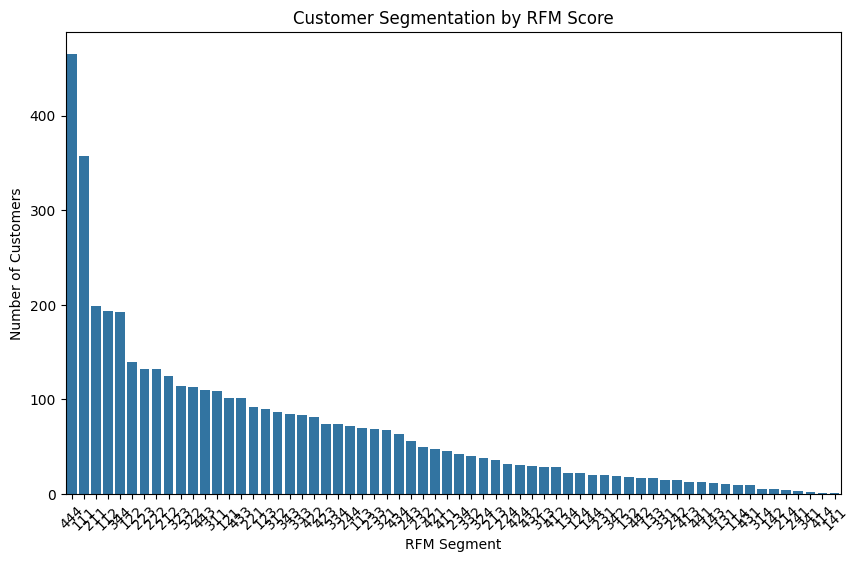

In [ ]:
# Visualizing RFM Segments
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_Segment', data=rfm_table, order=rfm_table['RFM_Segment'].value_counts().index)
plt.title('Customer Segmentation by RFM Score')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()



Insights from visualizing customer segmentation, starting high and declining over time, reveal:
- **Initial Peak**: Represents a significant customer base or behavior trend at the start.
- **Subsequent Decline**: Reflects changing market dynamics or customer preferences.
- **Strategic Response**: Guides adaptive strategies to address evolving challenges and capitalize on opportunities.
- **Holistic Understanding**: Enhances market insight for agile decision-making and sustainable growth.

In [ ]:
# Creating a new column to identify cancellation transactions
df['IsCancellation'] = df['InvoiceNo'].apply(lambda x: 1 if x.startswith('C') else 0)

# Calculating cancellation amount (positive value)
df['CancellationAmount'] = df.apply(lambda row: row['UnitPrice'] * row['Quantity'] if row['IsCancellation'] == 1 else 0, axis=1)

# Grouping by InvoiceDate and calculate cancellation amount statistics
cancellation_stats = df[df['IsCancellation'] == 1].groupby('InvoiceDate').agg({
    'CancellationAmount': ['sum', 'mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.50), lambda x: x.quantile(0.75)]
})

# Rename columns for clarity
cancellation_stats.columns = ['TotalCancelledAmount', 'AverageCancelledAmount', '25th Percentile', '50th Percentile (Median)', '75th Percentile']


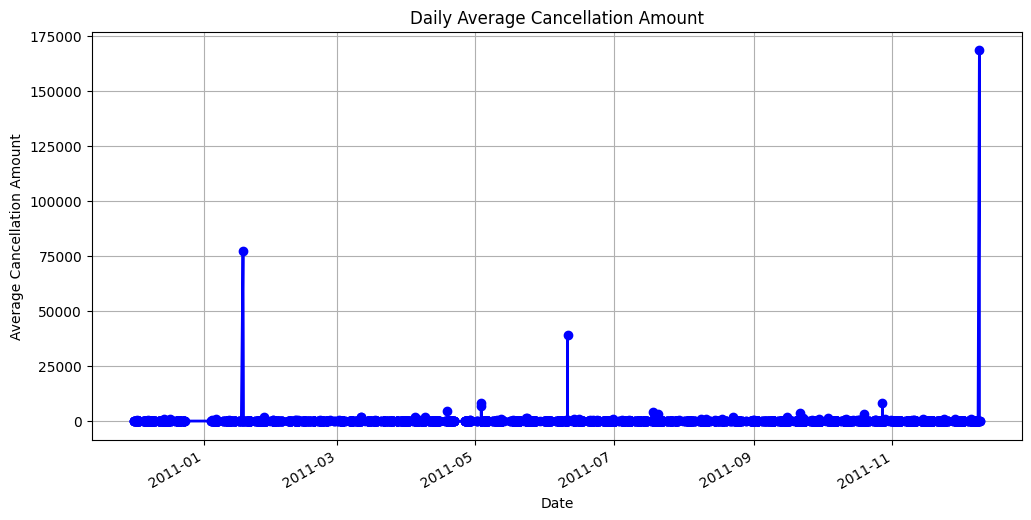

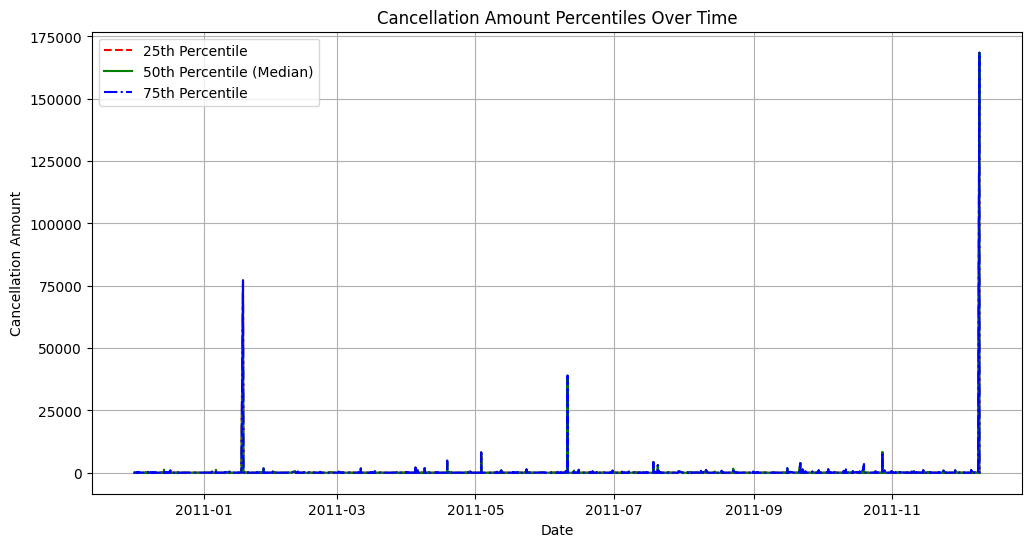

In [ ]:
import matplotlib.pyplot as plt

# Ploting daily average cancellation amount
plt.figure(figsize=(12, 6))
cancellation_stats['AverageCancelledAmount'].plot(kind='line', color='b', marker='o', linestyle='-', linewidth=2)
plt.title('Daily Average Cancellation Amount')
plt.xlabel('Date')
plt.ylabel('Average Cancellation Amount')
plt.grid(True)
plt.show()

# Ploting percentiles
plt.figure(figsize=(12, 6))
plt.plot(cancellation_stats.index, cancellation_stats['25th Percentile'], label='25th Percentile', color='r', linestyle='--')
plt.plot(cancellation_stats.index, cancellation_stats['50th Percentile (Median)'], label='50th Percentile (Median)', color='g', linestyle='-')
plt.plot(cancellation_stats.index, cancellation_stats['75th Percentile'], label='75th Percentile', color='b', linestyle='-.')
plt.title('Cancellation Amount Percentiles Over Time')
plt.xlabel('Date')
plt.ylabel('Cancellation Amount')
plt.legend()
plt.grid(True)
plt.show()


Insights on the trend of daily average cancellation amounts across different periods of the graph can be summarized as follows:

- **Beginning of the Graph**: Higher cancellation amounts early in the dataset indicate a period of increased cancellations, possibly due to initial customer dissatisfaction, order processing errors, or seasonal fluctuations.
  
- **Middle of the Graph**: A reduction in cancellation amounts suggests improved stability or service quality, likely due to enhanced customer satisfaction and refined operational processes.
  
- **End of the Graph**: An increase in cancellation amounts towards the end may reflect changing market conditions or operational challenges affecting customer behavior and purchase decisions.



Insights for Cancelation Amount Percentile Over Time

- **Initial High Percentile**: Reflects a significant proportion of cancellations early on, likely due to operational challenges or customer issues.
  
- **Gradual Reduction Over Time**: Shows an improvement in cancellation rates over the dataset's duration, possibly driven by operational adjustments and enhanced customer service.
  
- **Lowest Percentile Towards the End**: Represents the smallest proportion of cancellations towards the dataset's end, highlighting successful efforts in reducing cancellation rates.

Monitoring this trend provides insights into the effectiveness of corrective actions and operational improvements. It underscores the importance of ongoing analysis to maintain low cancellation rates and enhance overall business performance.

Calculate Country-Wise Average Order Value (AOV)

In [ ]:
# Calculating total amount (quantity * unit price) for each transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Grouping by Country and calculate average order value (AOV)
country_aov = df.groupby('Country')['TotalAmount'].mean().sort_values(ascending=False)

# Displaying country-wise average order value (AOV)
print(country_aov)


Country
Singapore               146.018297
Netherlands             120.925703
Australia               111.437381
Japan                   110.313184
Sweden                   86.928030
Denmark                  49.209614
Lithuania                47.458857
Lebanon                  37.641778
EIRE                     37.525936
Brazil                   35.737500
Norway                   34.255687
Greece                   32.948767
Finland                  32.756000
Bahrain                  32.258824
Czech Republic           31.525333
Switzerland              30.462953
Israel                   29.796520
United Arab Emirates     27.974706
Channel Islands          27.459881
Spain                    27.006177
France                   26.070113
Portugal                 25.554034
Austria                  25.543741
Germany                  24.864223
Canada                   24.280662
Iceland                  23.681319
Malta                    23.194567
Cyprus                   22.885000
Italy       



Summary of the analysis and insights derived from the average order value (AOV) by country:

1. **Regional Spending Differences**: AOV varies significantly across countries, with some nations like Singapore, Netherlands, and Australia showing higher AOV, suggesting affluent customer segments.

2. **Market Potential and Strategy**: Countries with higher AOV indicate potential for premium offerings and revenue generation, guiding strategic decisions for expansion and market targeting.

3. **Customer Segmentation**: AOV analysis helps in segmenting customers based on spending behavior, informing tailored marketing and product strategies for different regions.

4. **Operational Considerations**: Higher AOV countries may require specific operational adjustments to meet customer expectations and optimize supply chain logistics.

5. **Cultural and Economic Influences**: AOV differences reflect cultural preferences, economic conditions, and purchasing power, highlighting diverse market factors impacting customer spending.



<ipython-input-87-dff2035bc7a4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_aov.index, y=country_aov.values, palette='viridis')


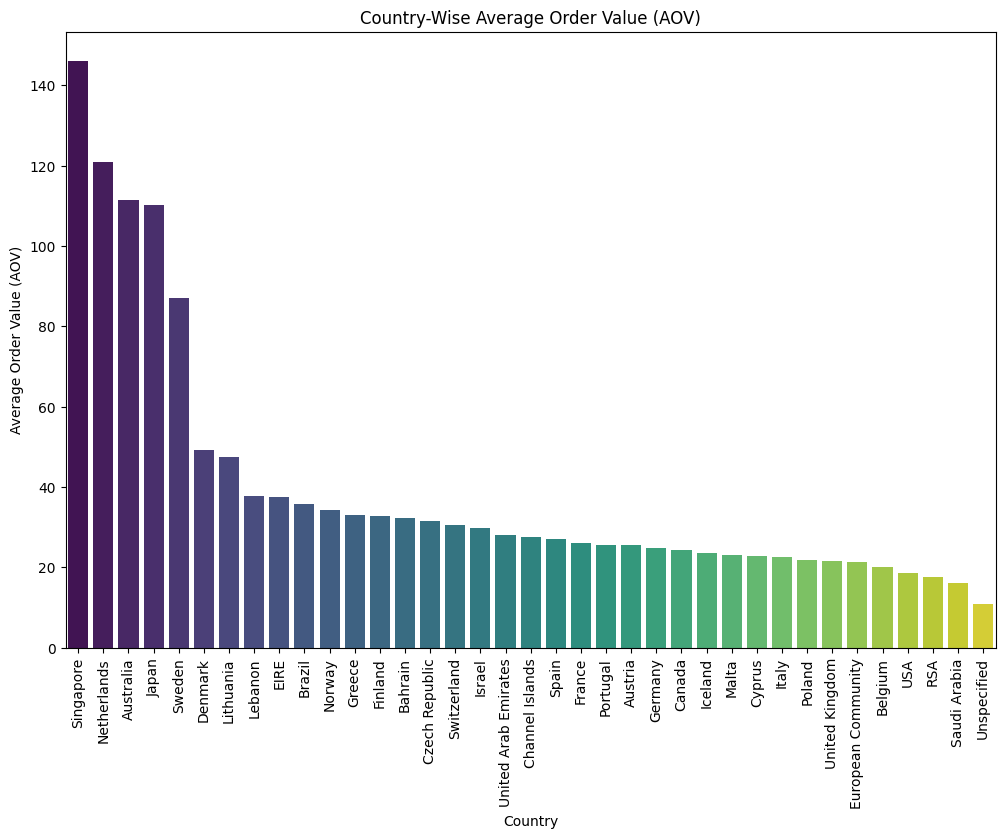

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ploting country-wise average order value (AOV)
plt.figure(figsize=(12, 8))
sns.barplot(x=country_aov.index, y=country_aov.values, palette='viridis')
plt.title('Country-Wise Average Order Value (AOV)')
plt.xlabel('Country')
plt.ylabel('Average Order Value (AOV)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



To compare the average order value (AOV) between customers based on their recency of purchase

<ipython-input-97-0fc14e811c14>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RecencyCategory', data=df, palette='Set2')


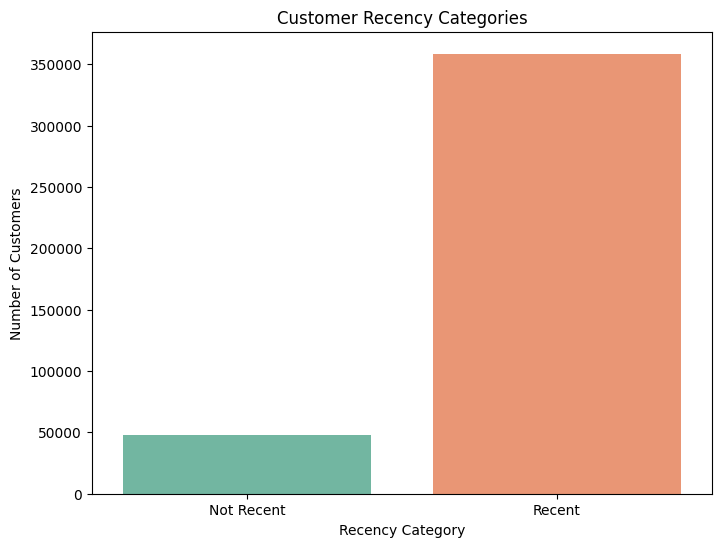

In [ ]:
# Loading the cleaned dataset (assuming 'cleaned_dataset.csv' is the path)
df = pd.read_csv('cleaned_dataset.csv', parse_dates=['InvoiceDate'])

# Calculating Recency for each customer
latest_date = df['InvoiceDate'].max()
df['Recency'] = (latest_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')).dt.days

# Defining a recency threshold (in days) for categorization
recency_threshold = 90

# Categorizing customers based on recency
df['RecencyCategory'] = df['Recency'].apply(lambda x: 'Recent' if x <= recency_threshold else 'Not Recent')

# Ploting the comparison of recency categories
plt.figure(figsize=(8, 6))
sns.countplot(x='RecencyCategory', data=df, palette='Set2')
plt.title('Customer Recency Categories')
plt.xlabel('Recency Category')
plt.ylabel('Number of Customers')
plt.show()


The insight that customers with recent purchases contribute more revenue suggests a need to focus on engaging less active or recent customers. Targeted strategies like personalized offers and proactive communication can motivate these customers to increase their purchases, driving growth and enhancing overall customer engagement. Continuously analyzing customer behavior allows businesses to optimize strategies and maximize revenue from different customer segments.